In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
blobR = 21

In [4]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_FS = f'ereco_FULLSIM_R{blobR}mm.npz' 
npz_filename_DS = f'ereco_DETSIM_R{blobR}mm.npz' 
npz_filename_DS_p200 = f'ereco_DETSIM_psf200_R{blobR}mm.npz' 
npz_filename_DS_CM = f'ereco_DETSIM_R{blobR}mm_202012.npz' 
npz_filename_FS_tT = f'ereco_FULLSIM_R{blobR}mm_testTrack.npz' 
npz_filename_DS_CM_tT = f'ereco_DETSIM_R{blobR}mm_202012_testTrack.npz' 
npz_filename_DS_NFLEX = f'ereco_NFLEX_DETSIM_R{blobR}mm_202012.npz'

In [5]:
d_FS = np.load(npz_path+npz_filename_FS)
d_DS = np.load(npz_path+npz_filename_DS)
d_DS_p200 = np.load(npz_path+npz_filename_DS_p200)
d_DS_CM = np.load(npz_path+npz_filename_DS_CM)
d_FS_tT = np.load(npz_path+npz_filename_FS_tT)
d_DS_CM_tT = np.load(npz_path+npz_filename_DS_CM_tT)
d_DS_NFLEX = np.load(npz_path+npz_filename_DS_NFLEX)

In [6]:
reco_0nubb_e_FS = d_FS['reco_0nubb_e']
reco_0nubb_e_DS = d_DS['reco_0nubb_e']
reco_0nubb_e_DS_p200 = d_DS_p200['reco_0nubb_e']
reco_0nubb_e_DS_CM = d_DS_CM['reco_0nubb_e']
reco_0nubb_e_DS_NFLEX = d_DS_NFLEX['reco_0nubb_e']

reco_0nubb_e_FS_tT = d_FS_tT['reco_0nubb_e']
reco_0nubb_e_DS_CM_tT = d_DS_CM_tT['reco_0nubb_e']

reco_selectron_e_FS = d_FS['reco_selectron_e']
reco_selectron_e_DS = d_DS['reco_selectron_e']
reco_selectron_e_DS_p200 = d_DS_p200['reco_selectron_e']
reco_selectron_e_DS_CM = d_DS_CM['reco_selectron_e']
reco_selectron_e_DS_NFLEX = d_DS_NFLEX['reco_selectron_e']


In [7]:
#Check limits of the Energy ROI 

emin = 2.40
emax = 2.54

## Track Energy

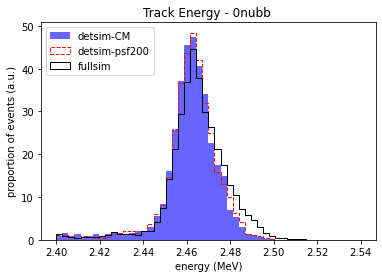

In [8]:
plt.hist(reco_0nubb_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(reco_0nubb_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')
plt.hist(reco_0nubb_e_FS[0], bins = 50, range = (emin, emax), density=True, color='black', histtype='step', label = 'fullsim')
#plt.hist(reco_0nubb_e_DS[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

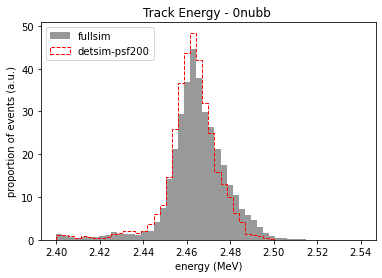

In [9]:
plt.hist(reco_0nubb_e_FS[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

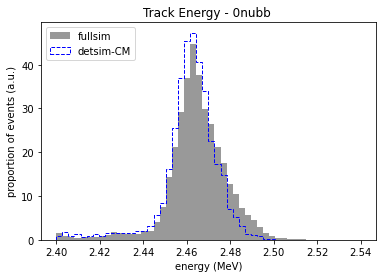

In [10]:
plt.hist(reco_0nubb_e_FS[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

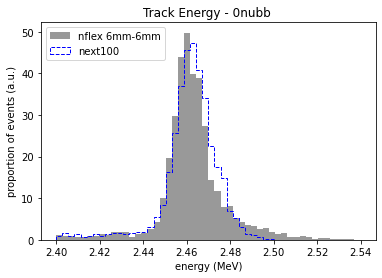

In [11]:
plt.hist(reco_0nubb_e_DS_NFLEX[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'nflex 6mm-6mm')
plt.hist(reco_0nubb_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'next100', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

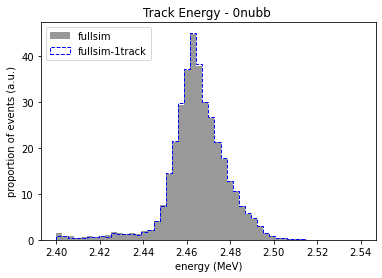

In [12]:
plt.hist(reco_0nubb_e_FS[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_FS_tT[0], bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'fullsim-1track', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 0nubb ')
plt.legend(loc=2);
#plt.yscale('log')
plt.show()

In [13]:
print("FULLSIM Mean = {:.5f} +- {:.5f}".format(np.mean(reco_0nubb_e_FS[0]), 
                                               np.std(reco_0nubb_e_FS[0])/np.sqrt(np.sum(reco_0nubb_e_FS[0]))))
print("DETSIM-psf200 Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_p200[0]), 
                                                                        np.std(reco_0nubb_e_DS_p200[0]/np.sqrt(np.sum(reco_0nubb_e_DS_p200[0]))),
                                                              100*np.mean(reco_0nubb_e_FS[0])/ np.mean(reco_0nubb_e_DS_p200[0])))
print("DETSIM CM Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_CM[0]),
                                                                  np.std(reco_0nubb_e_DS_CM[0])/np.sqrt(np.sum(reco_0nubb_e_DS_CM[0])),
                                                       100*np.mean(reco_0nubb_e_FS[0])/ np.mean(reco_0nubb_e_DS_CM[0])))


FULLSIM Mean = 2.46466 +- 0.00014
DETSIM-psf200 Mean = 2.46217 +- 0.00012 -> FS/DS = 100.10%
DETSIM CM Mean = 2.46156 +- 0.00013 -> FS/DS = 100.13%


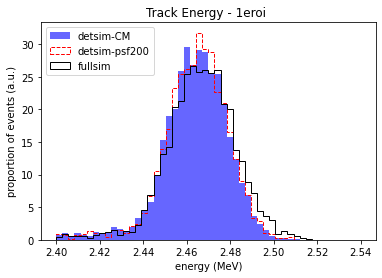

In [14]:
plt.hist(reco_selectron_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(reco_selectron_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')
plt.hist(reco_selectron_e_FS[0], bins = 50, range = (emin, emax), density=True, color='black', histtype='step', label = 'fullsim')
#plt.hist(reco_0nubb_e_DS[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - 1eroi ')
plt.legend(loc=2);
plt.show()

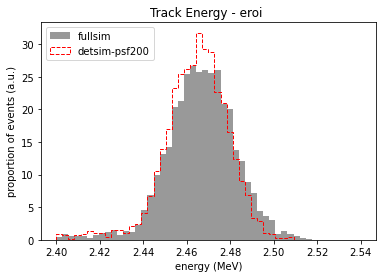

In [15]:
plt.hist(reco_selectron_e_FS[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_p200[0], bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - eroi ')
plt.legend(loc=2);
plt.show()

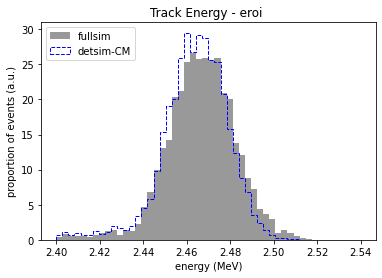

In [16]:
plt.hist(reco_selectron_e_FS[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - eroi ')
plt.legend(loc=2);
plt.show()

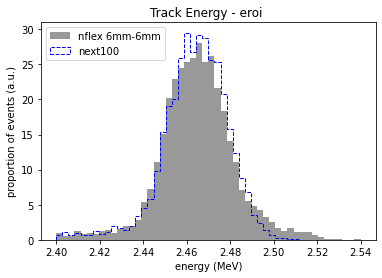

In [38]:
plt.hist(reco_selectron_e_DS_NFLEX[0], bins = 50, range = (emin, emax), density=True, alpha=0.8, color='gray', label = 'nflex 6mm-6mm')
plt.hist(reco_selectron_e_DS_CM[0], bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'next100', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Track Energy - eroi ')
plt.legend(loc=2);
plt.show()

In [17]:
print("FULLSIM Mean = {:.5f} +- {:.5f}".format(np.mean(reco_selectron_e_FS[0]),
                                              np.std(reco_selectron_e_FS[0])/np.sqrt(np.sum(reco_selectron_e_FS[0])) ))
print("DETSIM-psf200 Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_p200[0]), 
                                                                        np.std(reco_selectron_e_DS_p200[0])/np.sqrt(np.sum(reco_selectron_e_DS_p200[0])),
                                                                        100*np.mean(reco_selectron_e_FS[0])/ np.mean(reco_selectron_e_DS_p200[0])))

print("DETSIM-CM Mean = {:.5f} +- {:.5f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_CM[0]), 
                                                                 np.std(reco_selectron_e_DS_CM[0])/np.sqrt(np.sum(reco_selectron_e_DS_CM[0])), 
                                                                 100*np.mean(reco_selectron_e_FS[0])/ np.mean(reco_selectron_e_DS_CM[0])))


FULLSIM Mean = 2.46652 +- 0.00016
DETSIM-psf200 Mean = 2.46421 +- 0.00015 -> FS/DS = 100.09%
DETSIM-CM Mean = 2.46377 +- 0.00015 -> FS/DS = 100.11%


## BLOB Energy

### 0NUBB - BLOB1

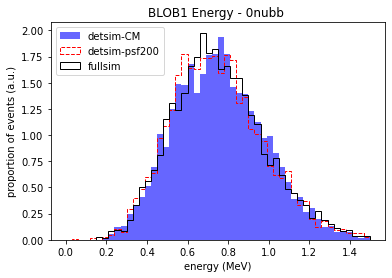

In [18]:
plt.hist(reco_0nubb_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(reco_0nubb_e_FS[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')
plt.hist(reco_0nubb_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

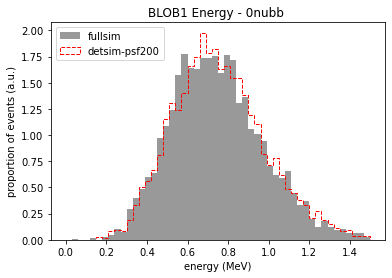

In [19]:
plt.hist(reco_0nubb_e_FS[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

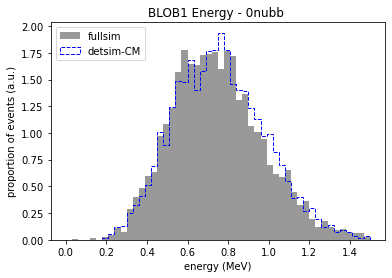

In [20]:
plt.hist(reco_0nubb_e_FS[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

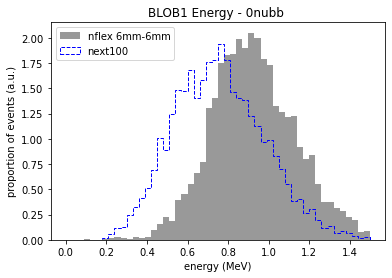

In [39]:
plt.hist(reco_0nubb_e_DS_NFLEX[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'nflex 6mm-6mm')
plt.hist(reco_0nubb_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'next100', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - 0nubb ')
plt.legend(loc=2);
plt.show()

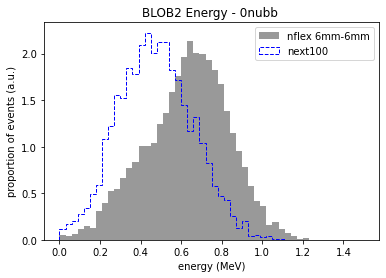

In [41]:
plt.hist(reco_0nubb_e_DS_NFLEX[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'nflex 6mm-6mm')
plt.hist(reco_0nubb_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'next100', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - 0nubb ')
plt.legend(loc=1);
plt.show()

In [21]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_0nubb_e_FS[1]), 
                                               np.std(reco_0nubb_e_FS[1])/np.sqrt(np.sum(reco_0nubb_e_FS[1]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_p200[1]), 
                                                                        np.std(reco_0nubb_e_DS_p200[1])/np.sqrt(np.sum(reco_0nubb_e_DS_p200[1])),
                                                              100*np.mean(reco_0nubb_e_FS[1])/ np.mean(reco_0nubb_e_DS_p200[1])))
print("DETSIM-CM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_CM[1]),
                                                                  np.std(reco_0nubb_e_DS_CM[1])/np.sqrt(np.sum(reco_0nubb_e_DS_CM[1])),
                                                       100*np.mean(reco_0nubb_e_FS[1])/ np.mean(reco_0nubb_e_DS_CM[1])))


FULLSIM Mean = 0.748 +- 0.004
DETSIM-psf200 Mean = 0.757 +- 0.004 -> FS/DS = 98.87%
DETSIM-CM Mean = 0.760 +- 0.004 -> FS/DS = 98.43%


### 0NUBB - BLOB2

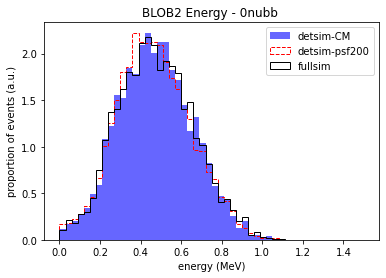

In [22]:
plt.hist(reco_0nubb_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(reco_0nubb_e_FS[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')
plt.hist(reco_0nubb_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - 0nubb ')
plt.legend(loc=1);
plt.show()

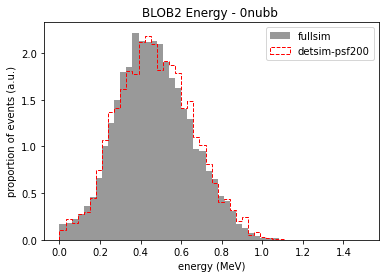

In [23]:
plt.hist(reco_0nubb_e_FS[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - 0nubb ')
plt.legend(loc=1);
plt.show()

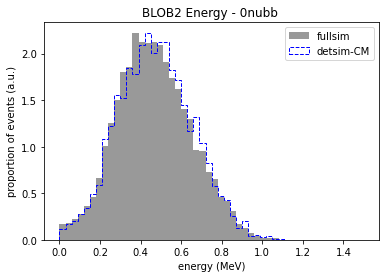

In [24]:
plt.hist(reco_0nubb_e_FS[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_0nubb_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - 0nubb ')
plt.legend(loc=1);
plt.show()

In [25]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_0nubb_e_FS[2]), 
                                               np.std(reco_0nubb_e_FS[2])/np.sqrt(np.sum(reco_selectron_e_FS[2]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_p200[2]), 
                                                                        np.std(reco_0nubb_e_DS_p200[2])/np.sqrt(np.sum(reco_0nubb_e_DS_p200[2])),
                                                              100*np.mean(reco_0nubb_e_FS[2])/ np.mean(reco_0nubb_e_DS_p200[2])))

print("DETSIM-CM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_0nubb_e_DS_CM[2]),
                                                                  np.std(reco_0nubb_e_DS_CM[2])/np.sqrt(np.sum(reco_0nubb_e_DS_CM[2])),
                                                       100*np.mean(reco_0nubb_e_FS[2])/ np.mean(reco_0nubb_e_DS_CM[2])))


FULLSIM Mean = 0.465 +- 0.006
DETSIM-psf200 Mean = 0.473 +- 0.004 -> FS/DS = 98.36%
DETSIM-CM Mean = 0.472 +- 0.004 -> FS/DS = 98.56%


### EROI - BLOB1

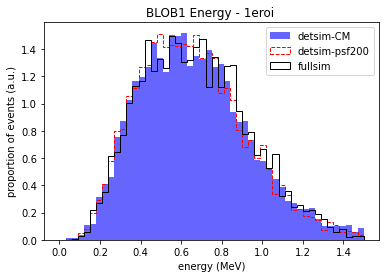

In [26]:
plt.hist(reco_selectron_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(reco_selectron_e_FS[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')
plt.hist(reco_selectron_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - 1eroi ')
plt.legend(loc=1);
plt.show()

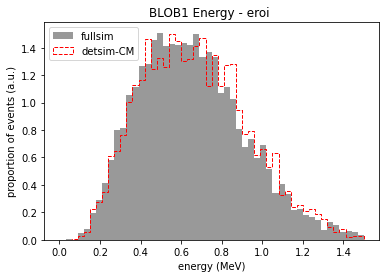

In [27]:
plt.hist(reco_selectron_e_FS[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_p200[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - eroi ')
plt.legend(loc=2);
plt.show()

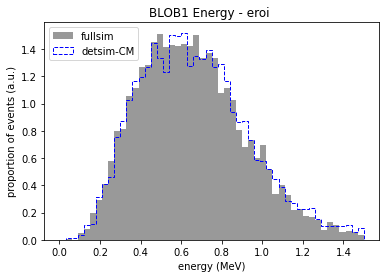

In [28]:
plt.hist(reco_selectron_e_FS[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - eroi ')
plt.legend(loc=2);
plt.show()

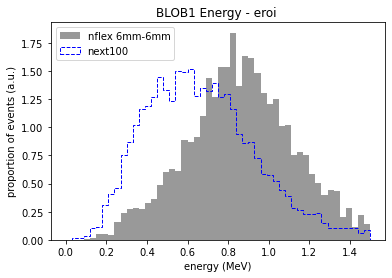

In [42]:
plt.hist(reco_selectron_e_DS_NFLEX[1], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'nflex 6mm-6mm')
plt.hist(reco_selectron_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'next100', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - eroi ')
plt.legend(loc=2);
plt.show()

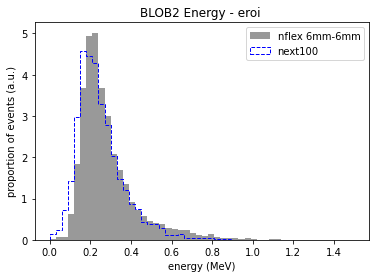

In [44]:
plt.hist(reco_selectron_e_DS_NFLEX[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'nflex 6mm-6mm')
plt.hist(reco_selectron_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'next100', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - eroi ')
plt.legend(loc=1);
plt.show()

In [29]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_selectron_e_FS[1]),
                                              np.std(reco_selectron_e_FS[1])/np.sqrt(np.sum(reco_selectron_e_FS[1]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_p200[1]), 
                                                                        np.std(reco_selectron_e_DS_p200[1])/np.sqrt(np.sum(reco_selectron_e_DS_p200[1])),
                                                                        100*np.mean(reco_selectron_e_FS[1])/ np.mean(reco_selectron_e_DS_p200[1])))
print("DETSIM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS[1]), 
                                                                 np.std(reco_selectron_e_DS[1])/np.sqrt(np.sum(reco_selectron_e_DS[1])), 
                                                                 100*np.mean(reco_selectron_e_FS[1])/ np.mean(reco_selectron_e_DS[1])))


FULLSIM Mean = 0.659 +- 0.005
DETSIM-psf200 Mean = 0.672 +- 0.005 -> FS/DS = 98.09%
DETSIM Mean = 0.667 +- 0.005 -> FS/DS = 98.70%


### EROI - BLOB2

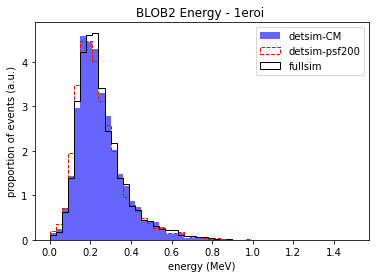

In [30]:
plt.hist(reco_selectron_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(reco_selectron_e_FS[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')
plt.hist(reco_selectron_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, color='black', histtype='step', label = 'fullsim')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - 1eroi ')
plt.legend(loc=1);
plt.show()

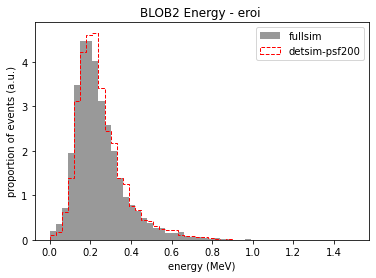

In [31]:
plt.hist(reco_selectron_e_FS[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_p200[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - eroi ')
plt.legend(loc=1);
plt.show()

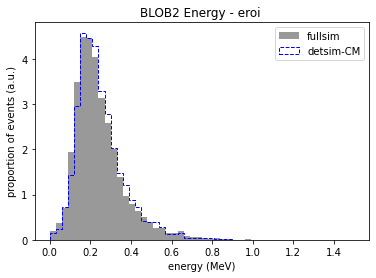

In [32]:
plt.hist(reco_selectron_e_FS[2], bins = 50, range = (0, 1.5), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(reco_selectron_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - eroi ')
plt.legend(loc=1);
plt.show()

In [33]:
print("FULLSIM Mean = {:.3f} +- {:.3f}".format(np.mean(reco_selectron_e_FS[2]),
                                              np.std(reco_selectron_e_FS[2])/np.sqrt(np.sum(reco_selectron_e_FS[2]))))
print("DETSIM-psf200 Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_p200[2]), 
                                                                        np.std(reco_selectron_e_DS_p200[2])/np.sqrt(np.sum(reco_selectron_e_DS_p200[2])),
                                                                        100*np.mean(reco_selectron_e_FS[2])/ np.mean(reco_selectron_e_DS_p200[2])))

print("DETSIM-CM Mean = {:.3f} +- {:.3f} -> FS/DS = {:.2f}%".format(np.mean(reco_selectron_e_DS_CM[2]), 
                                                                 np.std(reco_selectron_e_DS_CM[2])/np.sqrt(np.sum(reco_selectron_e_DS_CM[2])), 
                                                                 100*np.mean(reco_selectron_e_FS[2])/ np.mean(reco_selectron_e_DS_CM[2])))


FULLSIM Mean = 0.243 +- 0.004
DETSIM-psf200 Mean = 0.251 +- 0.004 -> FS/DS = 96.72%
DETSIM-CM Mean = 0.249 +- 0.004 -> FS/DS = 97.48%


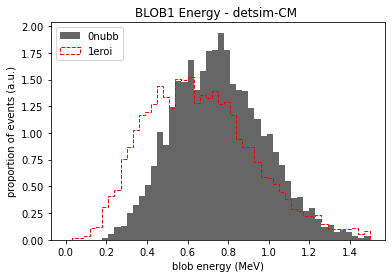

In [34]:
plt.hist(reco_0nubb_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='black', label = '0nubb')
plt.hist(reco_selectron_e_DS_CM[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = '1eroi', linestyle='dashed')

plt.xlabel('blob energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - detsim-CM ')
plt.legend(loc=2);
plt.show()

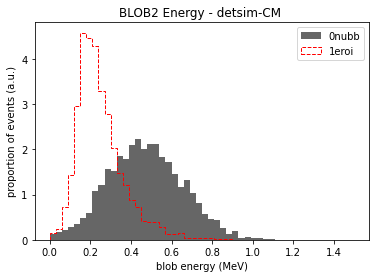

In [35]:
plt.hist(reco_0nubb_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='black', label = '0nubb')
plt.hist(reco_selectron_e_DS_CM[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = '1eroi', linestyle='dashed')

plt.xlabel('blob energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - detsim-CM ')
plt.legend(loc=1);
plt.show()

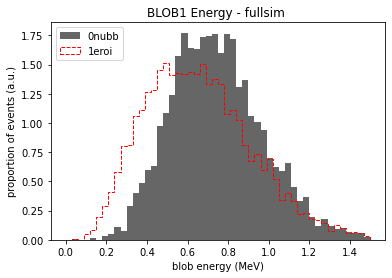

In [36]:
plt.hist(reco_0nubb_e_FS[1], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='black', label = '0nubb')
plt.hist(reco_selectron_e_FS[1], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = '1eroi', linestyle='dashed')

plt.xlabel('blob energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB1 Energy - fullsim ')
plt.legend(loc=2);
plt.show()

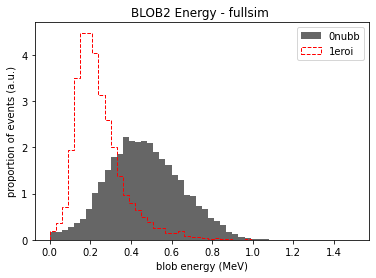

In [37]:
plt.hist(reco_0nubb_e_FS[2], bins = 50, range = (0, 1.5), density=True, alpha=0.6, color='black', label = '0nubb')
plt.hist(reco_selectron_e_FS[2], bins = 50, range = (0, 1.5), density=True, color='red', histtype='step', label = '1eroi', linestyle='dashed')

plt.xlabel('blob energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'BLOB2 Energy - fullsim ')
plt.legend(loc=1);
plt.show()